In [1]:
import numpy as np
import pandas as pd
import time

import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nn =  pd.read_csv('simple_nn_log.csv')
nn_dropout = pd.read_csv('simple_nn_dropout_log.csv')
cnn = pd.read_csv('cnn_channels_log.csv')
deep_cnn = pd.read_csv('Deep_cnn_log.csv')
mlp = pd.read_csv('mlp_log.csv')


In [8]:
list(nn.columns.values)

['Unnamed: 0',
 'epoch',
 'train loss',
 'val loss',
 'ratio',
 'train accuracy',
 'val accuracy',
 'computation duration']

In [10]:
nn['val accuracy'].values

array([ 0.81275 ,  0.85225 ,  0.864875,  0.87825 ,  0.887125,  0.8955  ,
        0.897   ,  0.895875,  0.899875,  0.904125,  0.908625,  0.897875,
        0.909125,  0.913   ,  0.911125,  0.913875,  0.91525 ,  0.918   ,
        0.916375,  0.918625,  0.924875,  0.91925 ,  0.92325 ,  0.93025 ,
        0.93    ,  0.925375,  0.927   ,  0.93075 ,  0.9295  ,  0.929125,
        0.930125,  0.93275 ,  0.933625,  0.932125,  0.930375,  0.9345  ,
        0.93725 ,  0.93675 ,  0.939125,  0.939125,  0.935875,  0.940375,
        0.94925 ,  0.940625,  0.943   ,  0.948875,  0.9395  ,  0.94275 ,
        0.946   ,  0.945125,  0.946125,  0.948375,  0.94075 ,  0.944875,
        0.9485  ,  0.94425 ,  0.948125,  0.942625,  0.948   ,  0.95    ,
        0.951   ,  0.952375,  0.954125,  0.951625,  0.953375,  0.951125,
        0.9535  ,  0.95625 ,  0.951875,  0.9545  ,  0.9555  ,  0.959625,
        0.95625 ,  0.952125,  0.958125,  0.9555  ,  0.954625,  0.957   ,
        0.956   ,  0.954875,  0.9585  ,  0.962   , 

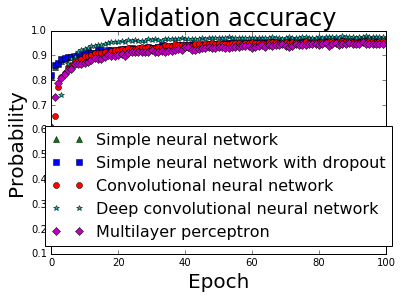

In [92]:
plt.plot(np.array(range(100)),nn['val accuracy'].values,'g^',label = 'Simple neural network')
plt.plot(np.array(range(100)),nn_dropout['val accuracy'].values,'bs',label = 'Simple neural network with dropout')
plt.plot(np.array(range(100)),cnn['val accuracy'].values,'ro',label = 'Convolutional neural network')
plt.plot(np.array(range(100)),deep_cnn['val accuracy'].values,'c*',label = 'Deep convolutional neural network')
plt.plot(np.array(range(100)),mlp['val accuracy'].values,'mD',label = 'Multilayer perceptron')
plt.legend(loc='lower center',fontsize = 16)
plt.title('Validation accuracy',fontsize = 24)
plt.ylabel('Probability',fontsize = 20)
plt.xlabel('Epoch',fontsize = 20)
plt.savefig('val_acc.png')
plt.show()

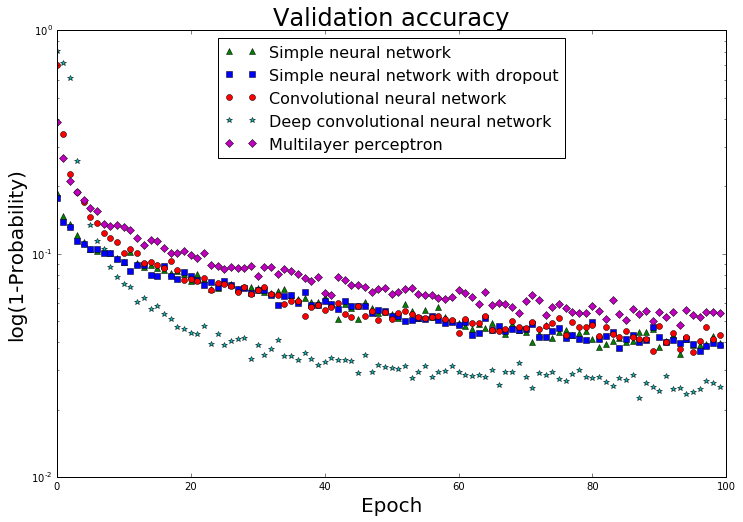

In [93]:
plt.figure(figsize=(12,8))
plt.semilogy(np.array(range(100)),1-nn['val accuracy'].values,'g^',label = 'Simple neural network')
plt.semilogy(np.array(range(100)),1-nn_dropout['val accuracy'].values,'bs',label = 'Simple neural network with dropout')
plt.semilogy(np.array(range(100)),1-cnn['val accuracy'].values,'ro',label = 'Convolutional neural network')
plt.semilogy(np.array(range(100)),1-deep_cnn['val accuracy'].values,'c*',label = 'Deep convolutional neural network')
plt.semilogy(np.array(range(100)),1-mlp['val accuracy'].values,'mD',label = 'Multilayer perceptron')
plt.legend(loc='upper center',fontsize=16)
plt.title('Validation accuracy',fontsize = 24)
plt.ylabel('log(1-Probability)',fontsize = 20)
plt.xlabel('Epoch',fontsize = 20)
plt.savefig('log_val_acc.png')
plt.show()

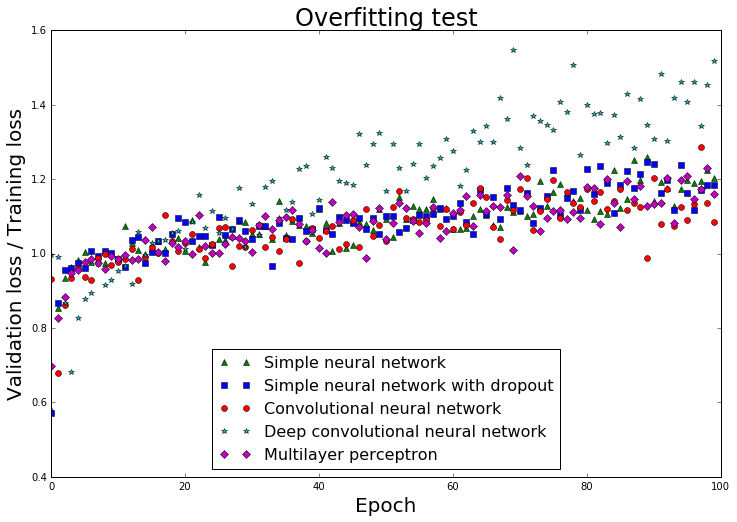

In [94]:
plt.figure(figsize=(12,8))
plt.plot(np.array(range(100)),nn['ratio'].values,'g^',label = 'Simple neural network')
plt.plot(np.array(range(100)),nn_dropout['ratio'].values,'bs',label = 'Simple neural network with dropout')
plt.plot(np.array(range(100)),cnn['ratio'].values,'ro',label = 'Convolutional neural network')
plt.plot(np.array(range(100)),deep_cnn['ratio'].values,'c*',label = 'Deep convolutional neural network')
plt.plot(np.array(range(100)),mlp['ratio'].values,'mD',label = 'Multilayer perceptron')
plt.legend(loc='lower center',fontsize=16)
plt.title('Overfitting test',fontsize = 24)
plt.ylabel('Validation loss / Training loss',fontsize = 20)
plt.xlabel('Epoch',fontsize = 20)
plt.savefig('ratio.png')
plt.show()

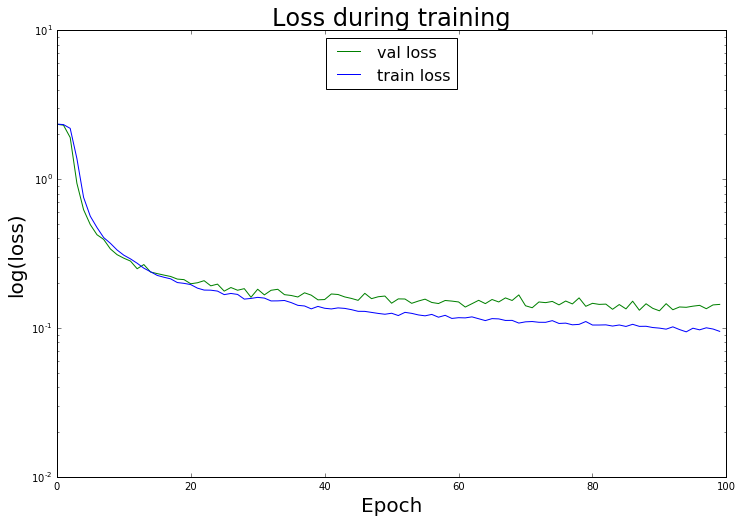

In [95]:
plt.figure(figsize=(12,8))
plt.semilogy(np.array(range(100)),deep_cnn['val loss'].values,'g',label = 'val loss')
plt.semilogy(np.array(range(100)),deep_cnn['train loss'].values,'b',label = 'train loss')
plt.legend(loc='upper center',fontsize=16)
plt.title('Loss during training',fontsize = 24)
plt.ylabel('log(loss)',fontsize = 20)
plt.xlabel('Epoch',fontsize = 20)
plt.savefig('cnn_loss.png')
plt.show()

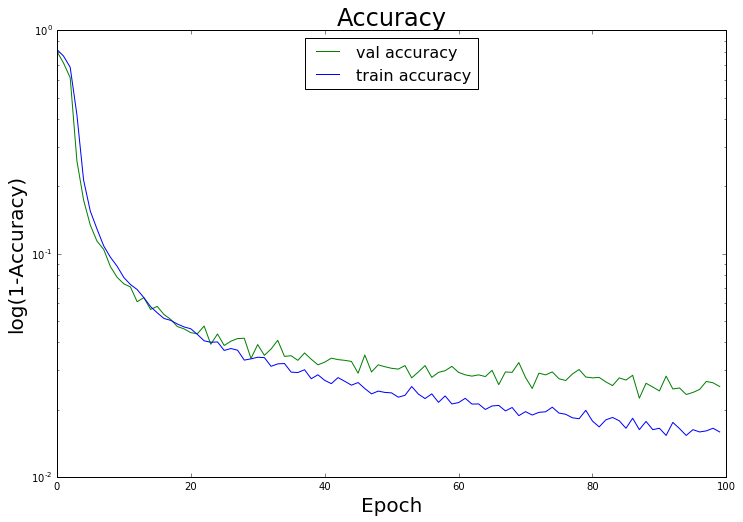

In [96]:
plt.figure(figsize=(12,8))
plt.semilogy(np.array(range(100)),1-deep_cnn['val accuracy'].values,'g',label = 'val accuracy')
plt.semilogy(np.array(range(100)),1-deep_cnn['train accuracy'].values,'b',label = 'train accuracy')
plt.legend(loc='upper center',fontsize=16)
plt.title('Accuracy',fontsize = 24)
plt.ylabel('log(1-Accuracy)',fontsize = 20)
plt.xlabel('Epoch',fontsize = 20)
plt.savefig('cnn_accuracy.png')
plt.show()

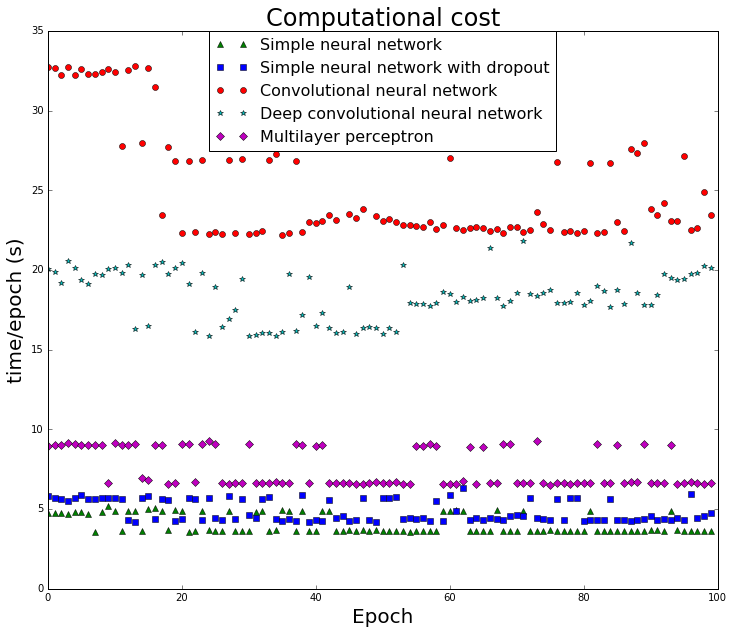

In [108]:
plt.figure(figsize=(12,10))
plt.plot(np.array(range(100)),nn['computation duration'].values,'g^',label = 'Simple neural network')
plt.plot(np.array(range(100)),nn_dropout['computation duration'].values,'bs',label = 'Simple neural network with dropout')
plt.plot(np.array(range(100)),cnn['computation duration'].values,'ro',label = 'Convolutional neural network')
plt.plot(np.array(range(100)),deep_cnn['computation duration'].values,'c*',label = 'Deep convolutional neural network')
plt.plot(np.array(range(100)),mlp['computation duration'].values,'mD',label = 'Multilayer perceptron')
plt.legend(bbox_to_anchor=(0.5, 1.014),loc='upper center',fontsize=16)
plt.title('Computational cost',fontsize = 24)
plt.ylabel('time/epoch (s)',fontsize = 20)
plt.xlabel('Epoch',fontsize = 20)
plt.savefig('comp.png')
plt.show()